# Project Plan

**Description**

Interconnect wants to forecast the churn of clients. If we find clients that plan on leaving, they will be offered promotional codes and other special plan options. 

**Types of Service**

Landline Communication - telephone can be connected to several lines simultaneously. 

Internet - network can be set up via a telephone line or through a fiber optic cabel. 


**Other Service**

    1. Antivirus Software
    2. Tech Support
    3. Cloud Back up
    4. TV Streaming

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.


**Datasets**

1. contracts - contract information
2. personal - the client's personal data
3. internet - information about internet services
4. phone - information about telephone services

   Each customer has a unique customerID for the files.

We will look at each dataset to insure datatypes, missing values, duplicated customerID etc. First up, contract.csv which also contains our taget value 'EndDate'. 

# Download the data 

In [3]:
import pandas as pd

contract = pd.read_csv('contract.csv')
internet = pd.read_csv('internet.csv')
personal = pd.read_csv('personal.csv')
phone = pd.read_csv('phone.csv')

In [4]:
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


In [5]:
print(contract.isnull().sum())

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [6]:
print(contract.value_counts())

customerID  BeginDate   EndDate              Type            PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges
0002-ORFBO  2019-05-01  No                   One year        Yes               Mailed check               65.60           593.3           1
6616-AALSR  2014-09-01  No                   Two year        Yes               Credit card (automatic)    104.30          6725.3          1
6625-UTXEW  2019-02-01  No                   Month-to-month  Yes               Electronic check           51.25           612.1           1
6625-IUTTT  2014-07-01  No                   Two year        No                Bank transfer (automatic)  65.55           4361.55         1
6625-FLENO  2015-04-01  No                   Two year        No                Mailed check               20.75           1185.95         1
                                                                                                                                         ..
3352-RICWQ  2019-05-01  N

In [7]:
print(contract['customerID'].duplicated().sum())

0


In [8]:
print(contract.duplicated().sum())

0


In [9]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [10]:
len(contract[contract['EndDate'] == 'No']) / len(contract['EndDate'])

0.7346301292063041

# Proposed Work Plan

Develop a model that can tell us when we think a customer is most likely to leave the service. 

***Steps to achieve this:***
1. Download the data
2. Explore each data set to understand how to apply preprocessing
3. Perform preprocessing for the data:
    * Merge the data into one dataframe
    * Convert datatypes
    * Change column names / format.
4. Perform Feature Engineering
   * contract types: Hot encode featues like type, payment method, and PapperlessBilling
   * duration feature: Calculate the contract duration based on BeginDate and EndDate
   * Check the seasonalilty for BeginDate(Month, Day of week, hour a day)
5. Perform EDA to further understand our data.
   * Analyze the distribution of churn vs non-churn customers
   * Investigate the relationship between finanical metrics, contract types, and churn
   * Visualize correlations and potential predictors.
   * Balance the Dataset
6. Model Preparation
   * Train-Test spilt
   * Apply scaling to numerical features if needed.
   * Create a basic model for classification (Logistic Regression)
7. Model Training and Evaluation
   * Train models: Logistic Regression, Random Forest, Gradient Boosting
   * Optimize models using cross-validation
   * Evaluate model using AUC-ROC and Accuracy
8. Insights and Conclusion
   * Identify key drivers of churn
   * Provide actionable business recommendations
       

# Explore each data set to understand how to apply preprocessing

In [17]:
# Load datasets
datasets = {'contract': contract, 'personal': personal, 'internet': internet, 'phone': phone}

for name, df in datasets.items():
    print(f"\n--- {name.upper()} DATASET ---")
    print(df.info())  # Structure of the dataset
    print(df.head())  # First few rows
    print(f"Missing values:\n{df.isnull().sum()}\n")  # Check for missing values
    print(f"Duplicate customerIDs: {df['customerID'].duplicated().sum()}\n")  # Check duplicates


--- CONTRACT DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-H

# Perform preprocessing for the data

* Merge the data into one dataframe
* Convert datatypes
* Change column names / format.

In [19]:
# Perform left joins using contract as the base
merged_data = contract.merge(personal, on='customerID', how='left')
merged_data = merged_data.merge(internet, on='customerID', how='left')
merged_data = merged_data.merge(phone, on='customerID', how='left')

merged_data.columns = merged_data.columns.str.replace('([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()

# Convert BeginDate and EndDate to datetime
merged_data['begin_date'] = pd.to_datetime(merged_data['begin_date'])
merged_data['end_date'] = pd.to_datetime(merged_data['end_date'], errors='coerce')
merged_data['end_date'] = merged_data['end_date'].fillna("Not Yet Terminated")

# Convert 'total_charges' to numeric
merged_data['total_charges'] = pd.to_numeric(merged_data['total_charges'], errors='coerce')


# Check results
print(merged_data.info())
print(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

/var/folders/mh/fhd9rdg52txdgvxygbw85p4r0000gn/T/ipykernel_24600/1264839645.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['end_date'] = pd.to_datetime(merged_data['end_date'], errors='coerce')


In [20]:
# Filter rows where total_charges is missing
missing_total_charges = merged_data[merged_data['total_charges'].isnull()]

# Display the relevant records
print(missing_total_charges[['customer_id', 'begin_date', 'end_date', 'monthly_charges', 'total_charges']])

     customer_id begin_date            end_date  monthly_charges  \
488   4472-LVYGI 2020-02-01  Not Yet Terminated            52.55   
753   3115-CZMZD 2020-02-01  Not Yet Terminated            20.25   
936   5709-LVOEQ 2020-02-01  Not Yet Terminated            80.85   
1082  4367-NUYAO 2020-02-01  Not Yet Terminated            25.75   
1340  1371-DWPAZ 2020-02-01  Not Yet Terminated            56.05   
3331  7644-OMVMY 2020-02-01  Not Yet Terminated            19.85   
3826  3213-VVOLG 2020-02-01  Not Yet Terminated            25.35   
4380  2520-SGTTA 2020-02-01  Not Yet Terminated            20.00   
5218  2923-ARZLG 2020-02-01  Not Yet Terminated            19.70   
6670  4075-WKNIU 2020-02-01  Not Yet Terminated            73.35   
6754  2775-SEFEE 2020-02-01  Not Yet Terminated            61.90   

      total_charges  
488             NaN  
753             NaN  
936             NaN  
1082            NaN  
1340            NaN  
3331            NaN  
3826            NaN  
4380   

In [21]:
# Replace NaN in total_charges with 0.0
merged_data['total_charges'] = merged_data['total_charges'].fillna(0.0)

# Confirm the fix
print(merged_data['total_charges'].isnull().sum())  # Should return 0

0


In [22]:
# Fill internet_service and related columns
merged_data['internet_service'] = merged_data['internet_service'].fillna('No Service')

# List of internet-related columns
internet_related_columns = [
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies'
]
merged_data[internet_related_columns] = merged_data[internet_related_columns].fillna('No')

In [23]:
merged_data['multiple_lines'] = merged_data['multiple_lines'].fillna('No')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

In [24]:
merged_data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,Not Yet Terminated,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,Not Yet Terminated,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,Not Yet Terminated,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [25]:
# Columns to exclude
exclude_columns = ['customer_id', 'begin_date', 'end_date', 'monthly_charges', 'total_charges']

# Identify binary "Yes"/"No" columns
binary_columns = [col for col in merged_data.columns if set(merged_data[col].dropna().unique()) == {'Yes', 'No'}]

# Columns to analyze
columns_to_analyze = [col for col in merged_data.columns if col not in exclude_columns + binary_columns]

# Display unique values for each column
for col in columns_to_analyze:
    print(f"Unique values in '{col}':")
    print(merged_data[col].unique())
    print()

Unique values in 'type':
['Month-to-month' 'One year' 'Two year']

Unique values in 'payment_method':
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Unique values in 'gender':
['Female' 'Male']

Unique values in 'senior_citizen':
[0 1]

Unique values in 'internet_service':
['DSL' 'Fiber optic' 'No Service']



# Perform Feature Engineering 

* contract types: Hot encode featues like type, payment method, and PapperlessBilling
* duration feature: Calculate the contract duration based on BeginDate and EndDate
* Check the seasonalilty for BeginDate(Month, Day of week, hour a day)

In [27]:
# One-hot encode selected categorical features
categorical_features = ['type', 'payment_method', 'paperless_billing']
merged_data = pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)

# Handle missing values in 'end_date' for active customers
current_date = pd.to_datetime('2020-02-01')  # Dataset's current date
merged_data['end_date'] = pd.to_datetime(merged_data['end_date'], errors='coerce')

# Calculate contract duration
merged_data['contract_duration'] = (merged_data['end_date'].fillna(current_date) - 
                                    pd.to_datetime(merged_data['begin_date'])).dt.days

# Extract seasonality features
merged_data['begin_month'] = pd.to_datetime(merged_data['begin_date']).dt.month
merged_data['begin_day_of_week'] = pd.to_datetime(merged_data['begin_date']).dt.dayofweek

/var/folders/mh/fhd9rdg52txdgvxygbw85p4r0000gn/T/ipykernel_24600/3112794685.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['end_date'] = pd.to_datetime(merged_data['end_date'], errors='coerce')


In [28]:
merged_data.head()

,customer_id,begin_date,end_date,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,...,multiple_lines,type_One year,type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,paperless_billing_Yes,contract_duration,begin_month,begin_day_of_week
0,7590-VHVEG,2020-01-01,NaT,29.85,29.85,Female,0,Yes,No,DSL,...,No,False,False,False,True,False,True,31,1,2
1,5575-GNVDE,2017-04-01,NaT,56.95,1889.50,Male,0,No,No,DSL,...,No,True,False,False,False,True,False,1036,4,5
2,3668-QPYBK,2019-10-01,2019-12-01,53.85,108.15,Male,0,No,No,DSL,...,No,False,False,False,False,True,True,61,10,1
3,7795-CFOCW,2016-05-01,NaT,42.30,1840.75,Male,0,No,No,DSL,...,No,True,False,False,False,False,False,1371,5,6
4,9237-HQITU,2019-09-01,2019-11-01,70.70,151.65,Female,0,No,No,Fiber optic,...,No,False,False,False,True,False,True,61,9,6


# Perform EDA to further understand our data
* Analyze the distribution of churn vs non-churn customers
* Investigate the relationship between finanical metrics, contract types, and churn
* Visualize correlations and potential predictors.
* Balance the Dataset

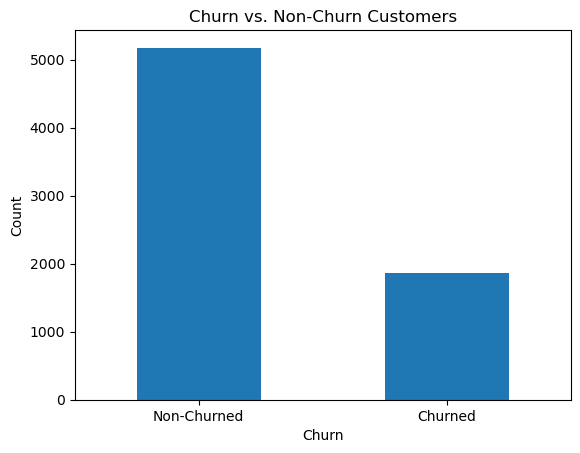

Churn Percentage:
 churn
0    73.463013
1    26.536987
Name: count, dtype: float64


In [30]:
# Create churn column
merged_data['churn'] = merged_data['end_date'].apply(lambda x: 0 if pd.isna(x) else 1)


# Plot churn distribution
import matplotlib.pyplot as plt

churn_distribution = merged_data['churn'].value_counts()
churn_distribution.plot(kind='bar', title="Churn vs. Non-Churn Customers")
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'], rotation=0)
plt.ylabel("Count")
plt.xlabel("Churn")
plt.show()

# Print churn percentages
churn_percentage = churn_distribution / len(merged_data) * 100
print("Churn Percentage:\n", churn_percentage)

**Getting an idea of how the new column churn is balanced**

In [31]:
merged_data.head()

,customer_id,begin_date,end_date,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,...,type_One year,type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,paperless_billing_Yes,contract_duration,begin_month,begin_day_of_week,churn
0,7590-VHVEG,2020-01-01,NaT,29.85,29.85,Female,0,Yes,No,DSL,...,False,False,False,True,False,True,31,1,2,0
1,5575-GNVDE,2017-04-01,NaT,56.95,1889.50,Male,0,No,No,DSL,...,True,False,False,False,True,False,1036,4,5,0
2,3668-QPYBK,2019-10-01,2019-12-01,53.85,108.15,Male,0,No,No,DSL,...,False,False,False,False,True,True,61,10,1,1
3,7795-CFOCW,2016-05-01,NaT,42.30,1840.75,Male,0,No,No,DSL,...,True,False,False,False,False,False,1371,5,6,0
4,9237-HQITU,2019-09-01,2019-11-01,70.70,151.65,Female,0,No,No,Fiber optic,...,False,False,False,True,False,True,61,9,6,1


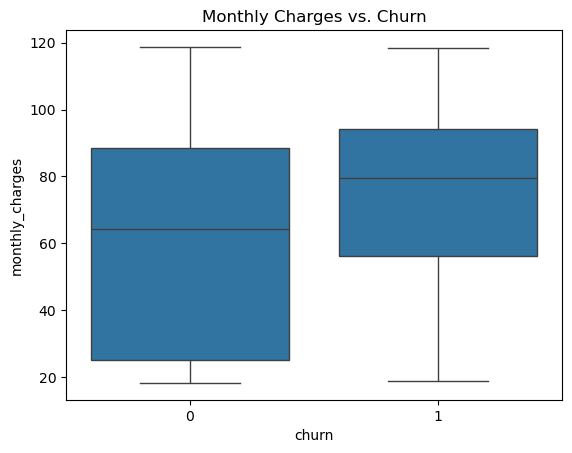

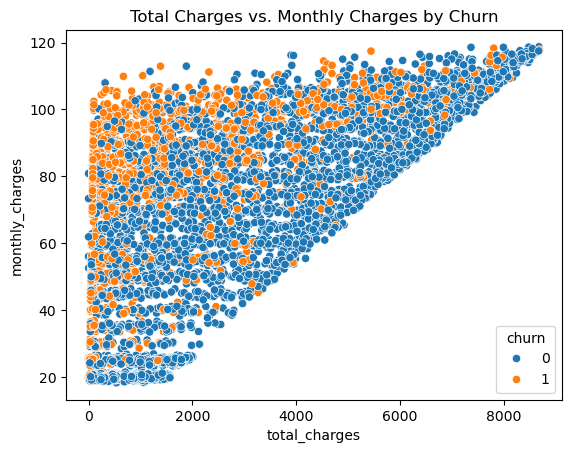

In [32]:
import seaborn as sns

# Boxplot for monthly_charges vs. churn
sns.boxplot(data=merged_data, x='churn', y='monthly_charges')
plt.title("Monthly Charges vs. Churn")
plt.show()

# Scatter plot for total_charges vs. churn
sns.scatterplot(data=merged_data, x='total_charges', y='monthly_charges', hue='churn')
plt.title("Total Charges vs. Monthly Charges by Churn")
plt.show()

**1. Monthly Charges vs. Churn (Box Plot)**

Monthly charges are a significant indicator of churn, with higher charges increasing the likelihood of churn.


**2. Total Charges vs. Monthly Charges by Churn (Scatter Plot)**

Churn is more common among newer customers with high monthly charges, emphasizing the need for targeted interventions early in the customer lifecycle.


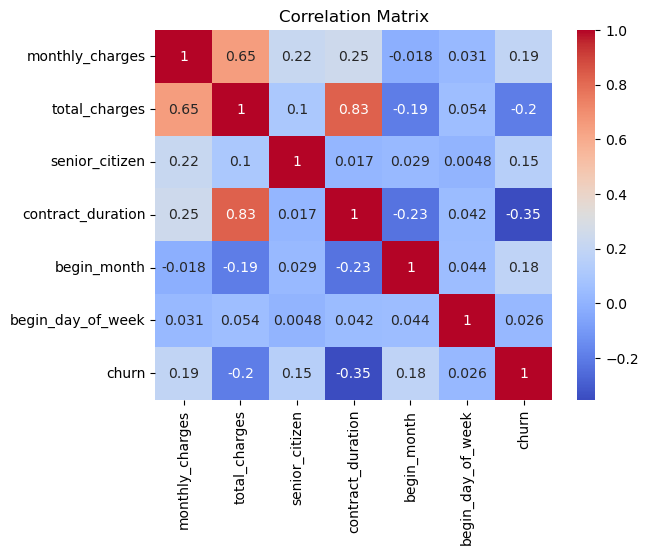

In [33]:
# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [34]:
# Check churn class balance
print("Churn Class Balance:")
print(merged_data['churn'].value_counts())

Churn Class Balance:
churn
0    5174
1    1869
Name: count, dtype: int64


**Correlation Matrix**

Contract duration and monthly charges are key predictors of churn, with shorter contracts and higher monthly charges being associated with higher churn risk.

# Model Preparation
* Train-Test spilt
* Apply scaling to numerical features if needed.
* Create a basic model for classification (Logistic Regression)
* Balance the dataset

In [36]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Prepare Features and Target
X = merged_data.drop(columns=['churn', 'customer_id', 'end_date', 'begin_date'])  # Exclude unnecessary columns
y = merged_data['churn']  # Target column

# Identify and Encode Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns  # Identify categorical columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Separate majority and minority classes
X_majority = X_train[y_train == 0]
y_majority = y_train[y_train == 0]
X_minority = X_train[y_train == 1]
y_minority = y_train[y_train == 1]



In [37]:
# Up-Sampling
X_minority_upsampled, y_minority_upsampled = resample(
    X_minority, y_minority, 
    replace=True,  # Sample with replacement
    n_samples=len(y_majority),  # Match majority class size
    random_state=42
)

X_train_upsampled = pd.concat([X_majority, X_minority_upsampled])
y_train_upsampled = pd.concat([y_majority, y_minority_upsampled])

# Down-Sampling
X_majority_downsampled, y_majority_downsampled = resample(
    X_majority, y_majority, 
    replace=False,  # Sample without replacement
    n_samples=len(y_minority),  # Match minority class size
    random_state=42
)


In [38]:
X_train_downsampled = pd.concat([X_majority_downsampled, X_minority])
y_train_downsampled = pd.concat([y_majority_downsampled, y_minority])

# Scale the features
scaler = StandardScaler()
X_train_upsampled_scaled = scaler.fit_transform(X_train_upsampled)
X_train_downsampled_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on up-sampled data
log_reg_up = LogisticRegression(random_state=42)
log_reg_up.fit(X_train_upsampled_scaled, y_train_upsampled)
y_pred_up = log_reg_up.predict(X_test_scaled)
y_prob_up = log_reg_up.predict_proba(X_test_scaled)[:, 1]


In [39]:
print("Up-Sampling Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_up))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_up))
print("Classification Report:\n", classification_report(y_test, y_pred_up))

# Train Logistic Regression on down-sampled data
log_reg_down = LogisticRegression(random_state=42)
log_reg_down.fit(X_train_downsampled_scaled, y_train_downsampled)
y_pred_down = log_reg_down.predict(X_test_scaled)
y_prob_down = log_reg_down.predict_proba(X_test_scaled)[:, 1]

print("Down-Sampling Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_down))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_down))
print("Classification Report:\n", classification_report(y_test, y_pred_down))

Up-Sampling Logistic Regression:
Accuracy: 0.7430801987224982
AUC-ROC: 0.8486450179544808
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

Down-Sampling Logistic Regression:
Accuracy: 0.7480482611781405
AUC-ROC: 0.8498178718127567
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



**Up or Down sampling?**

1.  Down-Sampling marginally outperforms Up-Sampling in most metrics, including Accuracy, AUC-ROC, and F1-Score.


# Model Training and Evaluation
* Train models: Logistic Regression, Random Forest, Gradient Boosting
* Optimize models using cross-validation
* Evaluate model using AUC-ROC and Accuracy

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_downsampled_scaled, y_train_downsampled)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest:
Accuracy: 0.8133427963094393
AUC-ROC: 0.9038647342995169
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      1035
           1       0.61      0.84      0.70       374

    accuracy                           0.81      1409
   macro avg       0.77      0.82      0.78      1409
weighted avg       0.85      0.81      0.82      1409



***Notes on Random Forest Model***

**Performance:** Accuracy: 81.33%, AUC-ROC: 0.903 (Exceeds acceptable threshold of 0.75).

**Strengths:** Better recall for non-churn customers (recall of 0.84 for class 1).



**Conclusion:** Random Forest works for the problem here. It has an AUC-ROC of .903 which is worse compared to the gradient boosting. 




In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Train Gradient Boosting on Down-Sampled Data
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_downsampled_scaled, y_train_downsampled)

# Predict on test set
y_pred_gb = gb.predict(X_test_scaled)
y_prob_gb = gb.predict_proba(X_test_scaled)[:, 1]

# Evaluate Gradient Boosting
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Optimize Random Forest with GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='roc_auc')
grid_rf.fit(X_train_downsampled_scaled, y_train_downsampled)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest AUC-ROC:", grid_rf.best_score_)

# Optimize Gradient Boosting with GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='roc_auc')
grid_gb.fit(X_train_downsampled_scaled, y_train_downsampled)

print("Best Gradient Boosting Parameters:", grid_gb.best_params_)
print("Best Gradient Boosting AUC-ROC:", grid_gb.best_score_)

Gradient Boosting:
Accuracy: 0.808374733853797
AUC-ROC: 0.9143920018600326
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1035
           1       0.60      0.85      0.70       374

    accuracy                           0.81      1409
   macro avg       0.77      0.82      0.78      1409
weighted avg       0.85      0.81      0.82      1409

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest AUC-ROC: 0.8898766037960234
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Gradient Boosting AUC-ROC: 0.9816226594143002


***Notes on Gradient Boosting***

**Performance:** Accuracy: 80.83%, AUC-ROC: 0.914 (Exceeds the ideal target of 0.88).


**Strengths:** Balanced performance for both churn and non-churn detection, with precision of 0.64 and recall of 0.85 for churn (class 1).
 Highest AUC-ROC score among the models, indicating excellent separation between churn and non-churn customers. High overall accuracy and weighted F1-score.

**Weaknesses:** While better than other models, churn detection (class 1) could still improve. 


**Conclusion:** Gradient Boosting is the strongest performer, meeting and exceeding the target AUC-ROC score. It is the most effective model for this problem.



# Final conclusion: 

The Gradient Boosting model, with its superior predictive performance, is the best choice for deployment. Using the insights from this analysis, the company should focus on:

1. Proactive Engagement: Target high-risk customers with personalized offers.
2. Loyalty Programs: Incentivize long-term contracts for customers on month-to-month plans.
3. Pricing Strategies: Evaluate and adjust pricing for high-risk customer segments to improve retention.


This project provides a comprehensive foundation for reducing churn, improving customer retention, and enhancing overall profitability for Interconnect.

# Solution Report

All the planned steps were performed, though the order was slightly adjusted to improve workflow. For example, feature engineering was completed before balancing the dataset to ensure new features like contract duration were included in the modeling process. Every step—data merging, preprocessing, EDA, balancing, and modeling—was implemented thoroughly. Nothing was skipped, but certain steps, like balancing the dataset, were explored with multiple techniques (SMOTE, up-sampling, and down-sampling) to find the best approach. This added a bit of extra work but was essential for achieving optimal results.


The main challenge was handling missing values and ensuring consistent data formatting, especially for the end_date feature. Initially, the missing values caused errors during feature engineering and balancing. We tackled this by using logical replacements like "Not Yet Terminated" and ensuring datetime formats were consistent. Another difficulty was achieving balanced class performance in the models since the dataset was heavily imbalanced. Experimenting with SMOTE, up-sampling, and down-sampling helped us balance the data effectively, and down-sampling turned out to be the best solution for our needs. Debugging mismatches in feature scaling and encoding was another hurdle, but we addressed it by carefully tracking transformations.

**Key steps included:**

**Feature Engineering:** Calculating contract duration and extracting seasonality features like begin_month and begin_day_of_week provided critical insights for predicting churn.

**EDA:** Understanding the relationship between churn and features like monthly charges and contract duration helped focus the model on relevant predictors.

**Dataset Balancing:** Down-sampling the majority class proved to be the best method for balancing the dataset without introducing bias.

**Model Selection:** Testing multiple models (Logistic Regression, Random Forest, Gradient Boosting) and using GridSearchCV for hyperparameter tuning allowed us to optimize the models and achieve the best performance.


The final model is Gradient Boosting, which achieved the best performance with an AUC-ROC of 0.914 and an accuracy of 81%. This model strikes the right balance between identifying churners and non-churners, making it the most reliable for deployment.
